## SPRINT 04 TASCA01: Visualització gràfica de Dades

**Descripció**

Utilitzant les biblioteques de visualització de dades Matplotlib o Seaborn, realitza els següents exercicis.

*RECORDA*

En la ciència de dades una de les tasques més importants és l'anàlisi. Una gràfica sempre ha d'anar acompanyada d'una explicació d'aquesta. Aporta informació.

- **Exercici 1**

Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

   - Una variable categòrica (Districte o Barri)
   - Una variable numèrica (Preu)
   - Una variable numèrica i una categòrica (Districte i Preu)
   - Dues variables numèriques (Any o Trimestre i Preu)
   - Tres variables (Barri o Districte, Trimestre i Preu)


- **Exercici 2**

Exporta els gràfics com imatges o com HTML.


- **Exercici 3**

Proposa alguna visualització que creguis que pot resultar interessant.

In [25]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline
from IPython.display import Image ##use the IPython Image object to display an Image
##To Plot interactively within an IPython notebook
%matplotlib inline 
import matplotlib.image as mpimg
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
##nltk.download("stopwords") ##Warning Package stopwords is already up-to-date!

## Exercici 1
<div class="alert alert-block alert-info">Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

  - Una variable categòrica (Districte o Barri)
  - Una variable numèrica (Preu)
  - Una variable numèrica i una categòrica (Districte i Preu)
  - Dues variables numèriques (Any o Trimestre i Preu)
  - Tres variables (Barri o Districte, Trimestre i Preu)  
</div>

In [2]:
##I load the data in a data frame
df = pd.read_csv('preu lloguer per trimestre i barri.csv')
df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


- We do a first inspection of the data, the shape, column names, general info that will get us  number of no nulls and type of objects..etc

In [3]:
##Check the shape of the data frame
df.shape

(584, 8)

In [4]:
##Check number and name of columns
df.columns

Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Lloguer_mitja', 'Preu'],
      dtype='object')

In [5]:
##Check type of data in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


- We observed that Preu, that should be a numeric type is an object.
I convert it to float type using pandas to_numeric, and check again the types of each column

In [6]:
##Convert Column Preu from object to float
##If I use astype(float) I cannot adjust errors as Nan
df['Preu'] = pd.to_numeric(df['Preu'], errors='coerce') ##If ‘coerce’, then invalid parsing will be set as NaN.
print(df.dtypes)

Any                 int64
Trimestre           int64
Codi_Districte      int64
Nom_Districte      object
Codi_Barri          int64
Nom_Barri          object
Lloguer_mitja      object
Preu              float64
dtype: object


- I use describe method to see a basic statistics of the data

In [7]:
##Check basic statistics of the df
df.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,584.0,584.000000,584.000000,584.000000,540.000000
mean,2021.0,2.500000,6.246575,37.000000,442.157222
std,0.0,1.118992,2.790726,21.089371,457.358745
min,2021.0,1.000000,1.000000,1.000000,6.700000
25%,2021.0,1.750000,4.000000,19.000000,12.775000
50%,2021.0,2.500000,7.000000,37.000000,232.750000
75%,2021.0,3.250000,8.000000,55.000000,815.875000
max,2021.0,4.000000,10.000000,73.000000,1816.500000


- I inspect the object type columns, number and unic values they have

In [8]:
##Checking the unique values of Trimesters registered
df.Trimestre.unique()

array([1, 2, 3, 4], dtype=int64)

In [9]:
##Checking the number of unique values of Trimesters registered
df.Trimestre.nunique()

4

In [10]:
##Checking the number districts registered
df.Codi_Districte.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [11]:
##Checking the name of districts registered
df.Nom_Districte.unique()

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí'], dtype=object)

In [156]:
##Checking the number of unique barris registered
df.Nom_Barri.unique()

array(['el Raval', 'el Barri Gòtic', 'la Barceloneta',
       'Sant Pere, Santa Caterina i la Ribera', 'el Fort Pienc',
       'la Sagrada Família', "la Dreta de l'Eixample",
       "l'Antiga Esquerra de l'Eixample",
       "la Nova Esquerra de l'Eixample", 'Sant Antoni', 'el Poble Sec',
       'la Marina del Prat Vermell', 'la Marina de Port',
       'la Font de la Guatlla', 'Hostafrancs', 'la Bordeta',
       'Sants - Badal', 'Sants', 'les Corts',
       'la Maternitat i Sant Ramon', 'Pedralbes',
       'Vallvidrera, el Tibidabo i les Planes', 'Sarrià',
       'les Tres Torres', 'Sant Gervasi - la Bonanova',
       'Sant Gervasi - Galvany', 'el Putxet i el Farró',
       'Vallcarca i els Penitents', 'el Coll', 'la Salut',
       'la Vila de Gràcia', "el Camp d'en Grassot i Gràcia Nova",
       'el Baix Guinardó', 'Can Baró', 'el Guinardó',
       "la Font d'en Fargues", 'el Carmel', 'la Teixonera',
       'Sant Genís dels Agudells', 'Montbau', "la Vall d'Hebron",
       'la Clota', '

In [155]:
##Checking the values of unique barris names registered
df.Nom_Barri.nunique()

73

In [14]:
##Checking the number values rtegisterd in lloguer mitja
df.Lloguer_mitja.unique()

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

- And check the nulls and NaN's values

In [15]:
#And cherck for nulls
df.isnull().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              44
dtype: int64

In [157]:
df.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,584.0,584.000000,584.000000,584.000000,584.000000
mean,2021.0,2.500000,6.246575,37.000000,408.844007
std,0.0,1.118992,2.790726,21.089371,455.009172
min,2021.0,1.000000,1.000000,1.000000,0.000000
25%,2021.0,1.750000,4.000000,19.000000,12.100000
50%,2021.0,2.500000,7.000000,37.000000,15.350000
75%,2021.0,3.250000,8.000000,55.000000,804.775000
max,2021.0,4.000000,10.000000,73.000000,1816.500000


- After the preliminar analysis, we see that the data frame has 584 rows and 8 columns, each one with its name.
Four columns are integrers and three more and object, and we changed the Preu column to float.

- The basic statistics of the integer and float columns tell us that the data is from 2021. We do not take into account the codes of Barri and Distric becasue they are just indexes. And the price we see the avareg 408.84, min 0, max 1816.5, and the distribution with the santdard deviations and quartils


- Checking the nulls, we see that the df has no Nan's except for the Preu column. 44 from 584. I'll put them to 0 just to reflect there is no data. Also because I tryed to delete them and I loose some Barris, and I don't want to lose data.

- The only thing that is quite wiard of this data frame is that the Lloguer mitja columns has 2 diferent values, one for the month one and another one for the surface. This could be 2 different df's.

- I will need to select the rows depending on these two values.

In [16]:
##Dropping of NaNs in Preu column
df = df.fillna(0)
df.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [17]:
df.isna().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [18]:
df.Nom_Barri.describe()

count          584
unique          73
top       el Raval
freq             8
Name: Nom_Barri, dtype: object

In [19]:
df.Nom_Districte.describe()

count            584
unique            10
top       Nou Barris
freq             104
Name: Nom_Districte, dtype: object

- I check a bit more specifically the data set, by grouping and sorting the data set.
- First I group by district and lloguer mitja and do the mean basically for the price

In [20]:
LloguermitjDistricte = df.groupby(['Nom_Districte', 'Lloguer_mitja']).mean()
LloguermitjDistricte

Any  \
Nom_Districte       Lloguer_mitja                                         
Ciutat Vella        Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Eixample            Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Gràcia              Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Horta-Guinardó      Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Les Corts           Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Nou Barris          Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Sant Andreu         Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Sant Martí          Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Sants-Montjuïc      Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   
Sarrià-Sant Gervasi Lloguer mitjà mensual (Euros/mes)            2021.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)  2021.0   

                                                                 Trimestre  \
Nom_Districte       Lloguer_mitja                                            
Ciutat Vella        Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Eixample            Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Gràcia              Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Horta-Guinardó      Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Les Corts           Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Nou Barris          Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Sant Andreu         Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Sant Martí          Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Sants-Montjuïc      Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   
Sarrià-Sant Gervasi Lloguer mitjà mensual (Euros/mes)                  2.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)        2.5   

                                                                 Codi_Districte  \
Nom_Districte       Lloguer_mitja                                                 
Ciutat Vella        Lloguer mitjà mensual (Euros/mes)                       1.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)             1.0   
Eixample            Lloguer mitjà mensual (Euros/mes)                       2.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)             2.0   
Gràcia              Lloguer mitjà mensual (Euros/mes)                       6.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)             6.0   
Horta-Guinardó      Lloguer mitjà me

- As I said, the lloguer mig column has two different values that mean very different thing. 
- I will need to use them separetly.
- I creat 2 data sets with only the rows I'm interested in in each case.   
- One with the avarage rent per month, and the other one the avarage rent per surface.

In [22]:
##Selection of the rows equal to Lloguer mitjà mensual (Euros/mes) using loc (no iloc)
LloguerMigEuros = df.loc[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
LloguerMigEuros

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
506,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1205.3
507,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),700.5
508,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),977.8
509,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),826.2


In [23]:
#Selection of the rows equal to Lloguer mitjà mensual (Euros/mes) using loc (no iloc)
LloguerMigSup = df.loc[df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']
LloguerMigSup

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


- Here I group again by Distric and Lloguer mig, but this time, the aggregation I use give me the max and min value for each field, and the district names it appears

In [153]:
##Group by Nom districte and lloguer mig, and then we see from the rest of variables the min an max values
##The level columns grouped by are renamed
LloguerMigEuroDistricteMinMax = df.groupby(['Nom_Districte', 'Lloguer_mitja']).agg(['max', 'min']).rename_axis(['Districte', 'Lloguer mig'])
LloguerMigEuroDistricteMinMax[['Preu', 'Nom_Barri']]

Preu  \
                                                                    max   
Districte           Lloguer mig                                           
Ciutat Vella        Lloguer mitjà mensual (Euros/mes)             968.4   
                    Lloguer mitjà per superfície (Euros/m2 mes)    16.4   
Eixample            Lloguer mitjà mensual (Euros/mes)            1220.8   
                    Lloguer mitjà per superfície (Euros/m2 mes)    14.0   
Gràcia              Lloguer mitjà mensual (Euros/mes)             961.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)    14.3   
Horta-Guinardó      Lloguer mitjà mensual (Euros/mes)             884.2   
                    Lloguer mitjà per superfície (Euros/m2 mes)    13.4   
Les Corts           Lloguer mitjà mensual (Euros/mes)            1816.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)    15.8   
Nou Barris          Lloguer mitjà mensual (Euros/mes)             803.7   
                    Lloguer mitjà per superfície (Euros/m2 mes)    12.7   
Sant Andreu         Lloguer mitjà mensual (Euros/mes)             827.2   
                    Lloguer mitjà per superfície (Euros/m2 mes)    12.5   
Sant Martí          Lloguer mitjà mensual (Euros/mes)            1364.7   
                    Lloguer mitjà per superfície (Euros/m2 mes)    17.3   
Sants-Montjuïc      Lloguer mitjà mensual (Euros/mes)             872.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)    13.8   
Sarrià-Sant Gervasi Lloguer mitjà mensual (Euros/mes)            1597.4   
                    Lloguer mitjà per superfície (Euros/m2 mes)    18.0   

                                                                        \
                                                                   min   
Districte           Lloguer mig                                          
Ciutat Vella        Lloguer mitjà mensual (Euros/mes)            759.2   
                    Lloguer mitjà per superfície (Euros/m2 mes)   12.3   
Eixample            Lloguer mitjà mensual (Euros/mes)            887.1   
                    Lloguer mitjà per superfície (Euros/m2 mes)   12.5   
Gràcia              Lloguer mitjà mensual (Euros/mes)            745.4   
                    Lloguer mitjà per superfície (Euros/m2 mes)   12.1   
Horta-Guinardó      Lloguer mitjà mensual (Euros/mes)              0.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)    0.0   
Les Corts           Lloguer mitjà mensual (Euros/mes)            904.8   
                    Lloguer mitjà per superfície (Euros/m2 mes)   12.5   
Nou Barris          Lloguer mitjà mensual (Euros/mes)              0.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)    0.0   
Sant Andreu         Lloguer mitjà mensual (Euros/mes)              0.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)    0.0   
Sant Martí          Lloguer mitjà mensual (Euros/mes)            700.5   
                    Lloguer mitjà per superfície (Euros/m2 mes)   10.8   
Sants-Montjuïc      Lloguer mitjà mensual (Euros/mes)              0.0   
                    Lloguer mitjà per superfície (Euros/m2 mes)    0.0   
Sarrià-Sant Gervasi Lloguer mitjà mensual (Euros/mes)            990.1   
                    Lloguer mitjà per superfície (Euros/m2 mes)   11.4   

                                                                                     Nom_Barri  \
                                                                                           max   
Districte           Lloguer mig                                                                  
Ciutat Vella        Lloguer mitjà mensual (Euros/mes)                           la Barceloneta   
                    Lloguer mitjà per superfície (Euros/m2 mes)                 la Barceloneta   
Eixample            Lloguer mitjà mensual (Euros/mes)                       la Sagrada Família   
                    Lloguer mitjà per superfície (

- And I do a quick visualization of the data with pandas and matplotlob
- Later I will visualize this better

<AxesSubplot:ylabel='Districte,Lloguer mig'>

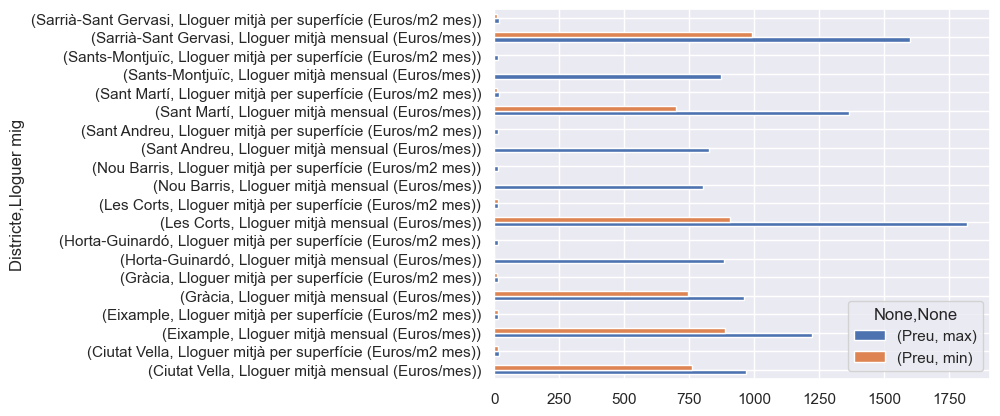

In [154]:
LloguerMigEuroDistricteMinMax[['Preu', 'Nom_Barri']].plot(kind ='barh')

- After a first inspection of the data set, I proceed to do some visualization of the data

<div class="alert alert-block alert-info">
  - Una variable categòrica (Districte o Barri)
</div>

- Here I want to do a distribution plot, in this case with a histogram, of the number of times each district name appears.

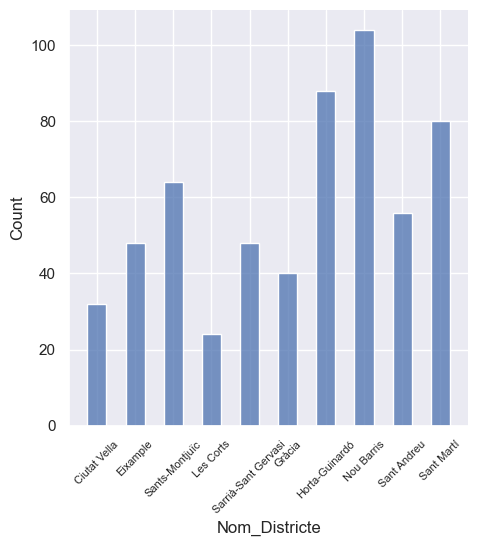

In [68]:
##Plotting with seaborn
g = sns.displot(df, x="Nom_Districte", shrink=0.5)
plt.xticks(fontsize=8)
g.set_xticklabels(rotation = 45);

- We see that the district with more appearences is Nou Barris, and the one with less is Les Corts


- Since the Barri column has up to 73 unique values, I will not plot in a density histogram, but I will use a wordcloud which it will not give me a quantitative visualization but I think is also very usefull to get to know the Barris with more data
- Some good examples of wordcloud: https://www.datacamp.com/tutorial/wordcloud-python

In [46]:
##I imported several libraries and the spanish stopwords, since the Barris values are in catalan, very similar to spanish
stop_words_sp = set(stopwords.words('spanish'))
stop_words_en = set(stopwords.words('english'))
##I append a couple of words I've seen are not included in the spanish stopwords
#stop_words_sp.append("els", "l")
##For this I could also use:  stopwords.update(["drink", "now", "wine", "flavor", "flavors"])


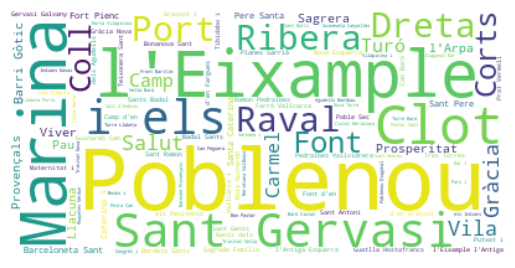

In [50]:
##I put all text of the column NomBarri together
text = " ".join(df['Nom_Barri'])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stop_words_sp, background_color="white").generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- The worl cloud, while is not quantitative, gives us a graphical idea of which barris appear more
- Looks like Poblenou, l'Eixample and Marina, are among the ones with more appearenses

<div class="alert alert-block alert-info">
  - Una variable numèrica (Preu)
</div>

- Here I will also use a density plot, but now I will just use the data correponding to the rows of the avarage rent per month from the lloguer mig column because it seams more relevant.
- I will do a second graph with the avarage rent per surface.

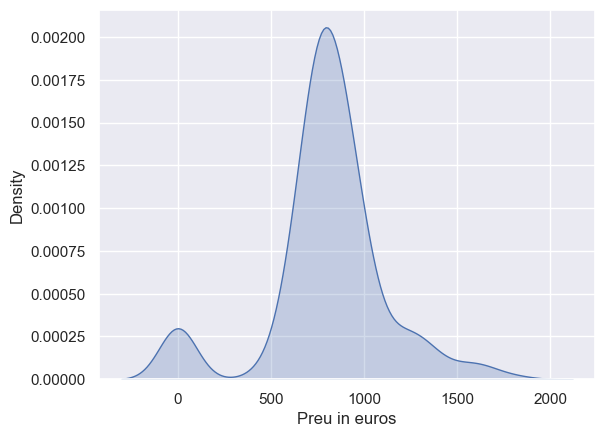

In [56]:

##Set a grey background
sns.set(style= "darkgrid")

##Make a default density plot
sns.kdeplot(LloguerMigEuros['Preu'], shade=True)
plt.xlabel('Preu in euros')
plt.show()

- We clearly see that we have a  bi-modal distributioin a lot of the prices are located in 0, that probably corresponds to the nulls I have assigned as 0.
- The big pick, probably is more significative, showing that the mean prices of the renting flats in euros is between 500 to 1000 euros. In that case we see that there are very few pricres below 500 will the tail from 1000 to 2000 has more values.

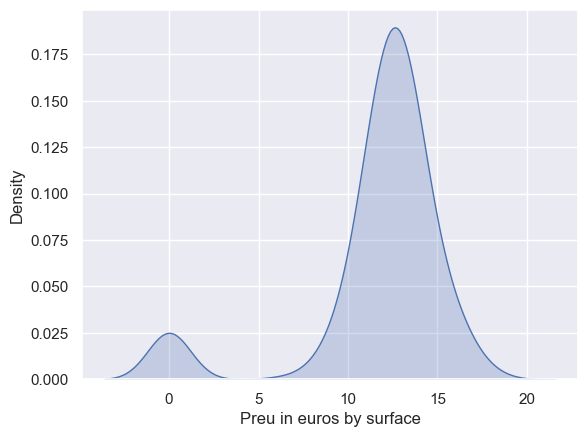

In [57]:
##Set a grey background
sns.set(style= "darkgrid")

##Make a default density plot
sns.kdeplot(LloguerMigSup['Preu'], shade=True)
plt.xlabel('Preu in euros by surface')

plt.show()

- Here we see a similar distribution. Bi-modal. With a low pick in 0 and a high pick between 10 and 15.
But in this case looks like the second pick has a more normal distribution, with both tails quite symmetric

<div class="alert alert-block alert-info">
  - Una variable numèrica i una categòrica (Districte i Preu)
</div>

- Here I want to show a boxplot, becasue it gives me a good overview of the data distribution. With the mean, sandard deviation, , outliers...etc
- I will do a plot of the avarage rent per month and per district.

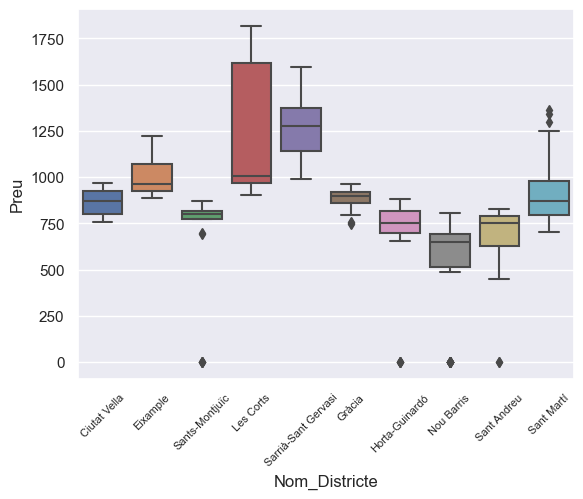

In [71]:
sns.boxplot(x = LloguerMigEuros['Nom_Districte'], y = LloguerMigEuros['Preu'])
plt.xticks(fontsize=8, rotation = 45);

- Here we see that there are some Districts that has a narrow distribution of the prices, like Sant-Montjuic, which means that the prices range stick very close to around 800 euros. While other districts, likeLes Corts, have a bvery wide range of prices.
- I would also like tot point out the 0 outliers in 3 Districts, that these are problably the ones that disturbed the previous two density graphs of the prices.

<div class="alert alert-block alert-info">
  - Dues variables numèriques (Any o Trimestre i Preu)  
</div>

- Here I ill check the differences or not of the avarage rent price per month per Trimester.
- I also want to use a boxplot here, so I can see if the differences in the statistical parameters controling the box plot, like mean, outliers, standard deviation, ...

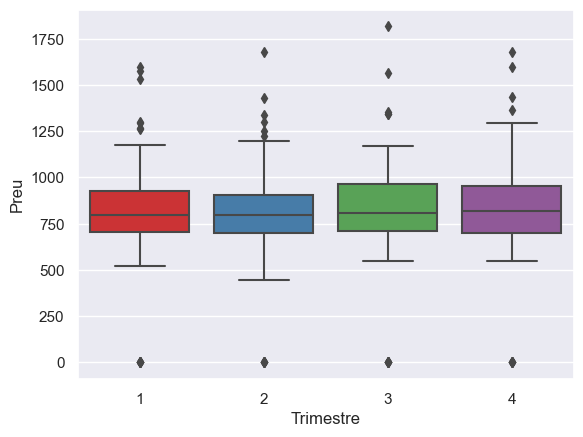

In [83]:
sns.boxplot(data = LloguerMigEuros, x = 'Trimestre', y='Preu', palette='Set1');


- We see that there are very few diferences in the avarage rent price per month per trimester
- Trimester 3 has the narrower variation, while 3 and 4 are the ones woth more variations.
- The mean seams the same for the 4 of them , with maybe the forth the one with the higer.
- In summary it doesn't look significative in which Trimester are we.

- I do a similar analisis with the varage rent price per surface with a Violin plot.
- Agin each Trimester look very similar to the others, with no significant variations

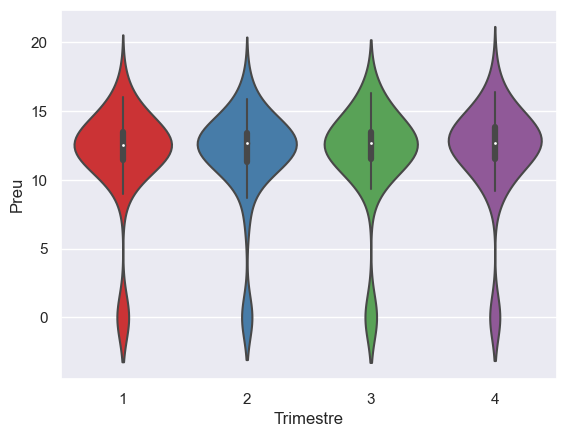

In [85]:
sns.violinplot(data = LloguerMigSup, x = 'Trimestre', y='Preu', palette='Set1');


<div class="alert alert-block alert-info">
  - Tres variables (Barri o Districte, Trimestre i Preu)  
</div>

- Here, I want to analise the distribution of the avarage rent per month, per district, and also showing the Trimester

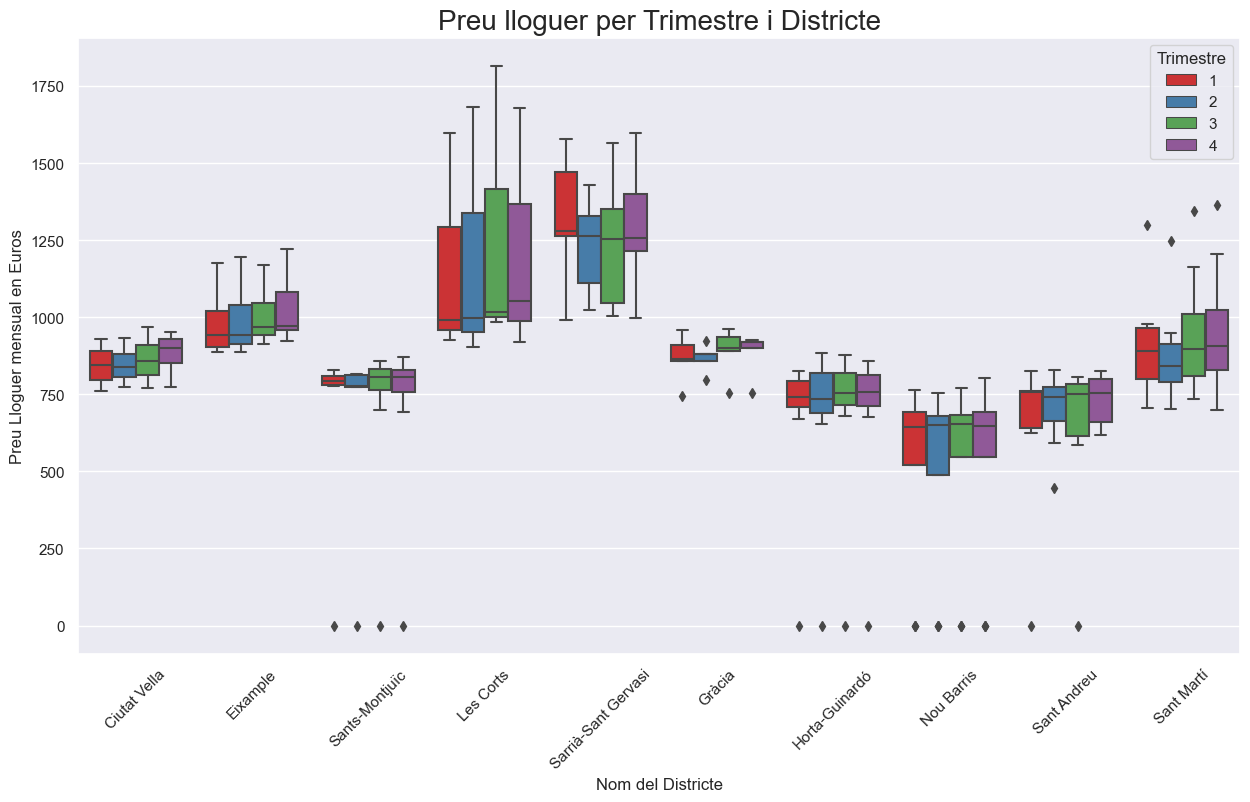

In [98]:
plt.figure(figsize=(15,8))
g = sns.boxplot(data = LloguerMigEuros, x = 'Nom_Districte', y='Preu', hue = 'Trimestre', palette='Set1')
g.set_title('Preu lloguer per Trimestre i Districte', fontsize=20)
plt.xlabel('Nom del Districte')
plt.ylabel('Preu Lloguer mensual en Euros')
plt.xticks(rotation = 45);


- Here we see the distribution of the proces that we have seen before per distric, however, is interesting to see how some times the box plot is more simetrical (Ciutat Vella), some has a biger upper part (Les Corts) and some has biger the lower part (Nou Barris).
- Now, while not very significant, we can also see variations in between of the Trimester for each district.
- This graph gives a lot of information dificult to summaryz here

### Exercici 2
<div class="alert alert-block alert-info">
   - Exporta els gràfics com imatges o com HTML.  
</div>


- To save the image in jpg we can use Matplotlib function savefig() at the end of the figure script.

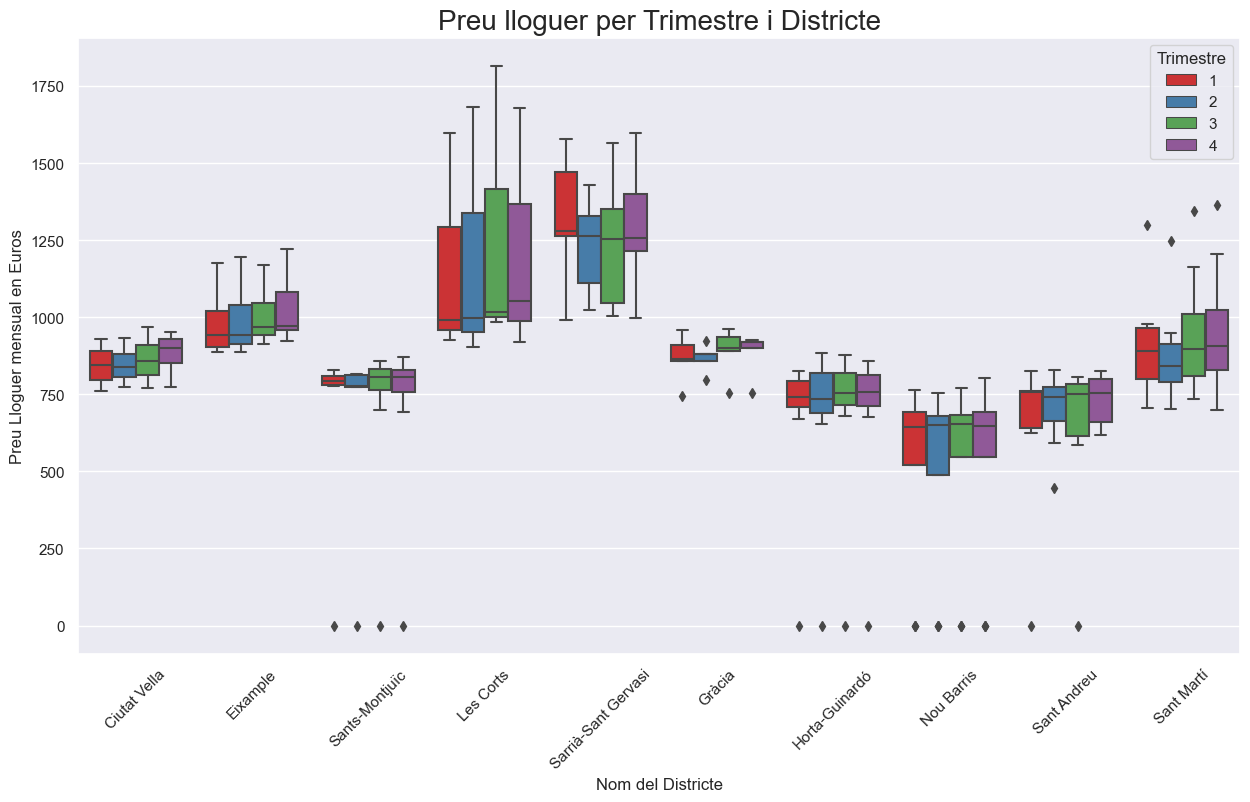

In [99]:
plt.figure(figsize=(15,8))
g = sns.boxplot(data = LloguerMigEuros, x = 'Nom_Districte', y='Preu', hue = 'Trimestre', palette='Set1')
g.set_title('Preu lloguer per Trimestre i Districte', fontsize=20)
plt.xlabel('Nom del Districte')
plt.ylabel('Preu Lloguer mensual en Euros')
plt.xticks(rotation = 45);
plt.savefig('PreuLloguerXtrimestreXDistricte.jpg')

- To show it saved I can Add it again inline

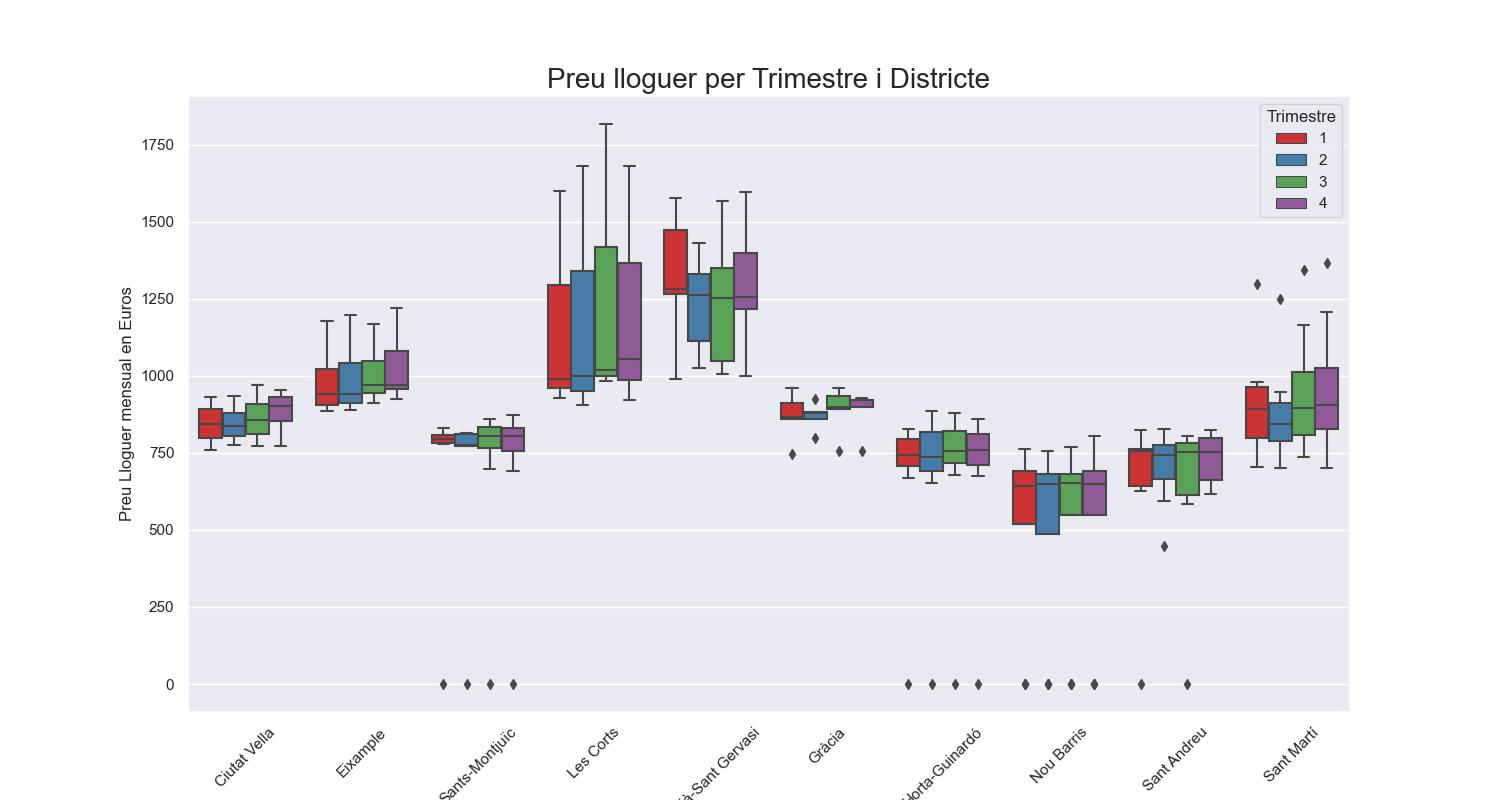

In [100]:
Image('PreuLloguerXtrimestreXDistricte.jpg')

**Interactive HTML Export in Python** from : https://plotly.com/python/interactive-html-export/

Plotly allows you to save interactive HTML versions of your figures to your local disk. 

*Interactive vs Static Export*

Plotly figures are interactive when viewed in a web browser: you can hover over data points, pan and zoom axes, and show and hide traces by clicking or double-clicking on the legend. You can export figures either to static image file formats like PNG, JPEG, SVG or PDF or you can export them to HTML files which can be opened in a browser. This page explains how to do the latter.

*Saving to an HTML file*

Any figure can be saved as an HTML file using the write_html method. These HTML files can be opened in any web browser to access the fully interactive figure.




The way to use it is doing the plots with plottly, and there are not all options in the Library, like Violin plot.
Here I add an example from the webpage
You need to do the plot with Plotly and I do no't dfind very complex options

In [107]:
import plotly.express as px

In [108]:
fig = px.scatter(x=range(10), y=range(10))
fig.write_html("TestHTML.html")

### Exercici 3
<div class="alert alert-block alert-info">
   
Proposa alguna visualització que creguis que pot resultar interessant.  
</div>

- I will show 2 visualizations:
    - The first one, I want to put the distribution of the avarage rent per month and per surface, per district one beside the other. To see if there are any disfferences in the distribution.
    - Second, I want to plot the avarage rent price per month on a Barcelona map to see the spatial distribution. 

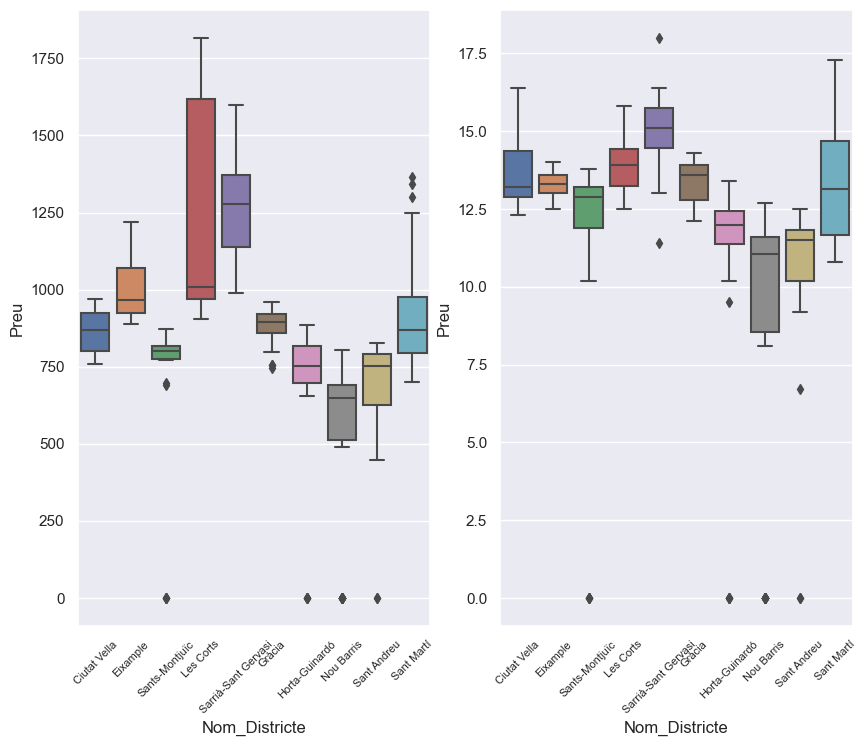

In [122]:
# initialize a figure
fig=plt.figure(figsize=(10,8))

# Cut your window in 1 row and 2 columns, and start a plot in the first part
plt.subplot(121)
sns.boxplot(x = LloguerMigEuros['Nom_Districte'], y = LloguerMigEuros['Preu'])
plt.xticks(fontsize=8, rotation = 45);

# And now add something in the second part:
plt.subplot(122)
sns.boxplot(x = LloguerMigSup['Nom_Districte'], y = LloguerMigSup['Preu'])
plt.xticks(fontsize=8, rotation = 45);

- We clearly see that the distribution is very similar, howevere, the ranges of the boxplot vary significally.

#### Spatial visualization

- In order to add a map with the avarage price distribution I follow this article:   
https://franherreragon.medium.com/making-barcelonas-robbery-cases-choropleth-map-71f1bd406dfc


- First I take the datafram and use just the 2 only columns I'm interested in, and set a new index

In [128]:
#I take the 2 columns I'm interested, group byDistrict name and do the mean of the price
districtPreu = LloguerMigEuros[['Nom_Districte', 'Preu']].groupby('Nom_Districte').mean()
##Reset the index
districtPreu.reset_index(inplace=True)
districtPreu.sort_values(by = ['Preu'], ascending=False)

,Nom_Districte,Preu
9,Sarrià-Sant Gervasi,1271.212500
4,Les Corts,1214.066667
1,Eixample,1000.545833
7,Sant Martí,916.450000
2,Gràcia,877.265000
0,Ciutat Vella,858.925000
8,Sants-Montjuïc,699.065625
3,Horta-Guinardó,695.461364
6,Sant Andreu,669.682143
5,Nou Barris,510.994231


In [129]:
#Check basic statistics
districtPreu.describe()

,Preu
count,10.000000
mean,871.366836
std,242.075423
min,510.994231
25%,696.362429
50%,868.095000
75%,979.521875
max,1271.212500


- I need to install and import new libraries.

In [132]:
# First let's call the libraries we are going to use
import folium
import xlrd
import json

- here I download a GeaJson file with the spatial data of the District poligons and coordinates
- and call folium library to bild a map for the coordinates we want

In [137]:
# We add the link which contains the GeoJson file
BCNGeo = 'https://raw.githubusercontent.com/martgnz/bcn-geodata/master/districtes/districtes.geojson'

# We call folium's library to build a map
BCN_map = folium.Map(location=[41.39, 2.17], zoom_start=12) # in location we must add the city's coordinates

- Here I want to check the type of data I have and see which column coincide with my column Name of district
- -I read and put ina a the GeoJson file with GeoPandas and put it in a geodataframe (Icheck the type)

In [150]:
##import geopandas as gpd
mapDistrictInfo =  gpd.read_file(BCNGeo)
type(mapDistrictInfo)

geopandas.geodataframe.GeoDataFrame

- And then I plot the columns to see and check whcih one has the district names

In [151]:
mapDistrictInfo.columns


Index(['ID_ANNEX', 'ANNEXDESCR', 'ID_TEMA', 'TEMA_DESCR', 'ID_CONJUNT',
       'CONJ_DESCR', 'ID_SUBCONJ', 'SCONJ_DESC', 'ID_ELEMENT', 'ELEM_DESCR',
       'NIVELL', 'NDESCR_CA', 'NDESCR_ES', 'NDESCR_EN', 'TERME', 'DISTRICTE',
       'BARRI', 'AEB', 'SEC_CENS', 'GRANBARRI', 'ZUA', 'AREA_I', 'LITERAL',
       'PERIMETRE', 'AREA', 'ORD_REPRES', 'CODI_UA', 'TIPUS_UA', 'NOM', 'WEB1',
       'WEB2', 'WEB3', 'DOCUMENTA', 'RANGESCALA', 'TIPUS_POL', 'GRUIX_ID',
       'GRUIXDIMEN', 'ESTIL_ID', 'ESTIL_QGIS', 'VALOR1QGIS', 'VALOR2QGIS',
       'COL_FARCIT', 'FCOL_DESCR', 'FHEX_COLOR', 'COL_DESCR', 'HEX_COLOR7',
       'geometry'],
      dtype='object')

In [152]:
mapDistrictInfo['NOM']

0           Ciutat Vella
1               Eixample
2         Sants-Montjuïc
3              Les Corts
4    Sarrià-Sant Gervasi
5                 Gràcia
6         Horta-Guinardó
7             Nou Barris
8            Sant Andreu
9             Sant Martí
Name: NOM, dtype: object

- Finally I plot my data in the map.

In [138]:
# Now we can build our choropleth map by calling the .choropleth method
##This works because probably the Json file key Nom is the same as our Nom districte

BCN_map.choropleth(geo_data=BCNGeo, # GeoJson Coordinates
                   data=districtPreu,   # The table which contains the values we are analysing
                   columns=['Nom_Districte', 'Preu'],
                   key_on='feature.properties.NOM', # We chose the key we need in the GeoJson file
                   fill_color='YlOrRd',
                   fill_opacity=0.7,
                   line_opacity=0.4,
                   legend_name='Distribució Preu Lloguer mensual per Districte a Barcelona ciutat')


BCN_map

- For me seeing the spatial distribution of the data is also very imprtant and can give a lot of interpretations